Builder Agent Mermaid Diagram:
%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	analyze_request(analyze_request)
	generate_agent_json(generate_agent_json)
	validate_json(validate_json)
	repair_json(repair_json)
	save_json(save_json)
	compile_code(compile_code)
	__end__([<p>__end__</p>]):::last
	__start__ --> analyze_request;
	analyze_request --> generate_agent_json;
	compile_code --> __end__;
	generate_agent_json --> validate_json;
	repair_json --> validate_json;
	save_json --> compile_code;
	validate_json -. &nbsp;repair&nbsp; .-> repair_json;
	validate_json -. &nbsp;valid&nbsp; .-> save_json;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



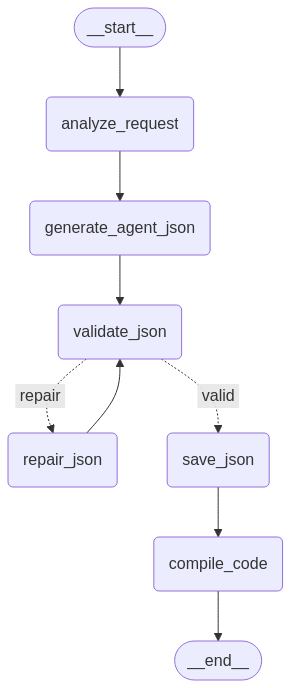


Builder Agent Graphviz Visualization:
To use graphviz visualization, install pygraphviz: pip install pygraphviz


In [1]:
# Visualize the builder agent
from builder_agent import create_builder_graph
from IPython.display import display, Image
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Load environment variables from .env file
from dotenv import load_dotenv
import os

# Load the .env file to set environment variables like OPENAI_API_KEY
load_dotenv()

# Verify that the API key is loaded
if not os.getenv("OPENAI_API_KEY"):
    print("Warning: OPENAI_API_KEY environment variable is not set.")
    print("Please create a .env file with your OpenAI API key or set it manually.")

# Create a builder agent instance
builder = create_builder_graph()

# Display the Mermaid diagram as text
print("Builder Agent Mermaid Diagram:")
print(builder.get_graph().draw_mermaid())

# Display the Mermaid diagram as PNG using the Mermaid.Ink API
display(
    Image(
        builder.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
            wrap_label_n_words=9,
        )
    )
)

# Try to use graphviz if available
try:
    print("\nBuilder Agent Graphviz Visualization:")
    display(Image(builder.get_graph().draw_png()))
except ImportError:
    print(
        "To use graphviz visualization, install pygraphviz: pip install pygraphviz"
    )


In [2]:
# Use the builder agent to create a new agent from a natural language request

# Define the request for a web research agent
request = """
Create a decision-making document analysis agent that:
1. Takes a text document as input
2. Analyzes the document through multiple pathways based on content
3. Makes decisions that determine different processing branches
4. Generates customized reports based on document classification

The agent should have a branching workflow:
- Initialize with the document text
- Process the document into analyzable components:
  - Split text into words
  - Count word frequencies using iterative processing
- Branch based on document classification:
  - If financial keywords detected (money, finance, investment, banking):
    → Follow financial document processing path
    → Apply specialized financial metrics analysis
  - If technical keywords detected (tech, software, hardware, computer):
    → Follow technical document processing path
    → Apply specialized technical terminology analysis
  - Otherwise:
    → Follow general document processing path
    → Apply standard readability analysis
- Generate a tailored report specific to the document type:
  - Include classification-specific insights
  - Provide word frequency statistics
  - List key terminology based on document type
- Terminate after delivering the appropriate report type

The agent should demonstrate complex conditional branching logic, state-based processing, and different execution paths based on document content analysis.

"""

# Set up the initial state for the builder
initial_state = {
    "request": request,
    "output_dir": "./generated_agents",
    "model_name": "o3-mini"  # You can change this to another model if needed
}

# Run the builder agent
result = builder.invoke(initial_state)

# Display the results
print("\nBuilder Agent Results:")
print(f"Agent JSON Path: {result.get('json_path', 'Not generated')}")
print(f"Agent Python Path: {result.get('py_path', 'Not generated')}")

# If the agent was successfully created, we can load and test it
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    print("\nAgent was successfully created!")
    
    # You could import and test the agent here
    # For example:
    # import importlib.util
    # import sys
    # 
    # # Extract the module name from the path
    # module_name = os.path.basename(result['py_path']).replace('.py', '')
    # spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    # module = importlib.util.module_from_spec(spec)
    # sys.modules[module_name] = module
    # spec.loader.exec_module(module)
    # 
    # # Get the agent from the module
    # agent = module.create_agent()
    # 
    # # Test the agent
    # test_result = agent.invoke({"input": "What is the latest news about AI?"})
    # print(test_result)
else:
    print("\nAgent creation failed or the file doesn't exist.")
    if result.get('error'):
        print(f"Error: {result['error']}")


Analyzing request...
Generating agent JSON definition...
Validating agent JSON...
LangGraph code generated and saved to /var/folders/t1/9ky83tv128d3s8xz9xk20pn80000gn/T/document_analyzer_agent.py
HTML visualization saved to /var/folders/t1/9ky83tv128d3s8xz9xk20pn80000gn/T/document_analyzer_agent_viz.html
Generated visualization for validation: /var/folders/t1/9ky83tv128d3s8xz9xk20pn80000gn/T/document_analyzer_agent_viz.html
Validation passed
Agent JSON saved to: ./generated_agents/document_analyzer_agent.json
Agent Python code saved to: ./generated_agents/document_analyzer_agent.py
Agent visualization saved to: ./generated_agents/document_analyzer_agent_viz.html
Compiling agent to Python code...
Using previously generated Python code at: ./generated_agents/document_analyzer_agent.py
Using previously generated visualization at: ./generated_agents/document_analyzer_agent_viz.html

Builder Agent Results:
Agent JSON Path: ./generated_agents/document_analyzer_agent.json
Agent Python Path: .

Generated Agent Mermaid Diagram:
%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	initialize(initialize)
	word_count(word_count)
	classify(classify)
	report(report)
	__end__([<p>__end__</p>]):::last
	__start__ --> initialize;
	classify --> report;
	initialize --> word_count;
	report --> __end__;
	word_count --> classify;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



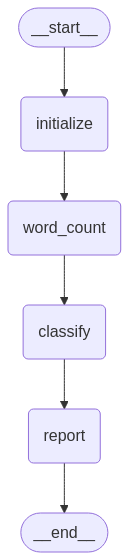


Agent loaded and visualized successfully!


In [3]:
# Load and visualize the generated agent
import importlib.util
import sys
from IPython.display import Image
import os
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Extract the module name from the path
if result.get('py_path') and os.path.exists(result.get('py_path', '')):
    # Get the module name from the path
    module_name = os.path.basename(result['py_path']).replace('.py', '')
    
    # Import the module dynamically
    spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
    module = importlib.util.module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    
    # Create the agent
    agent = module.create_agent_graph()
    
    # Visualize the agent graph using Mermaid
    try:
        # Display the Mermaid diagram as text
        print("Generated Agent Mermaid Diagram:")
        print(agent.get_graph().draw_mermaid())
        
        # Display the Mermaid diagram as PNG using the Mermaid.Ink API
        display(
            Image(
                agent.get_graph().draw_mermaid_png(
                    draw_method=MermaidDrawMethod.API,
                    curve_style=CurveStyle.LINEAR,
                    node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff"),
                    wrap_label_n_words=9,
                )
            )
        )
        
        print("\nAgent loaded and visualized successfully!")
    except Exception as e:
        print(f"Error visualizing agent: {str(e)}")
else:
    print("Cannot visualize agent: Python file not found")


In [6]:
# Test the DocumentProcessor agent with a sample document
# Load the document processor agent
print("Loading the DocumentProcessor agent...")

# Check if the agent module is already loaded
if 'documentprocessor' not in sys.modules and result.get('py_path') and os.path.exists(result.get('py_path', '')):
    try:
        # Get the module name from the path
        module_name = os.path.basename(result['py_path']).replace('.py', '')
        
        # Import the module dynamically
        spec = importlib.util.spec_from_file_location(module_name, result['py_path'])
        module = importlib.util.module_from_spec(spec)
        sys.modules[module_name] = module
        spec.loader.exec_module(module)
        
        print(f"Successfully loaded the {module_name} agent module")
    except Exception as e:
        print(f"Error loading the DocumentProcessor agent: {str(e)}")
else:
    print("DocumentProcessor agent is already loaded or the Python file was not found")

if 'documentprocessor' in sys.modules:
    # Create a sample document
    sample_document = """
    This is a technical document about software development and computer programming.
    The software industry continues to evolve with new technologies emerging every day.
    Developers need to stay updated with the latest hardware and software trends.
    Programming languages like Python, JavaScript, and Java remain popular choices for tech projects.
    """
    
    # Initialize the agent
    document_processor = sys.modules['documentprocessor']
    agent = document_processor.create_agent_graph()
    
    # Set up the initial state with the document
    initial_state = {"document": sample_document}
    
    # Run the agent
    print("\nTesting DocumentProcessor agent with a technical document sample:")
    print("-" * 50)
    result = agent.invoke(initial_state)
    
    # Display the results
    print("\nDocument Classification:", result.get('classification', 'Not classified'))
    print("\nTop 10 Words:")
    for word, count in result.get('report', {}).get('top_10_words', []):
        print(f"  {word}: {count}")
    
    print("\nFull Report:")
    import json
    print(json.dumps(result.get('report', {}), indent=2))
else:
    print("DocumentProcessor agent not found in loaded modules")


Loading the DocumentProcessor agent...
Successfully loaded the document_analyzer_agent agent module
DocumentProcessor agent not found in loaded modules
